# 1. Import the Libraries

In [2]:
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install seaborn
%pip install scikit-learn
%pip install missingno
%pip install pandoc

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated pa

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
import missingno as msno
%matplotlib inline

In [4]:
#Kfaya Warnings
import warnings
warnings.filterwarnings("ignore")

# 2. Import the dataset

In [6]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath, header = None, names =["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"])

In [7]:
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [8]:
df.replace('?', np.NaN, inplace = True)
df

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0,4,8569.86180
2768,21,1,34.600,0,0,3,2020.17700
2769,19,2,26.030,1,1,1,16450.89470
2770,23,2,18.715,0,0,1,21595.38229


# 3. Data Wrangling

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


age               4
gender            0
bmi               0
no_of_children    0
smoker            7
region            0
charges           0
dtype: int64


<Axes: >

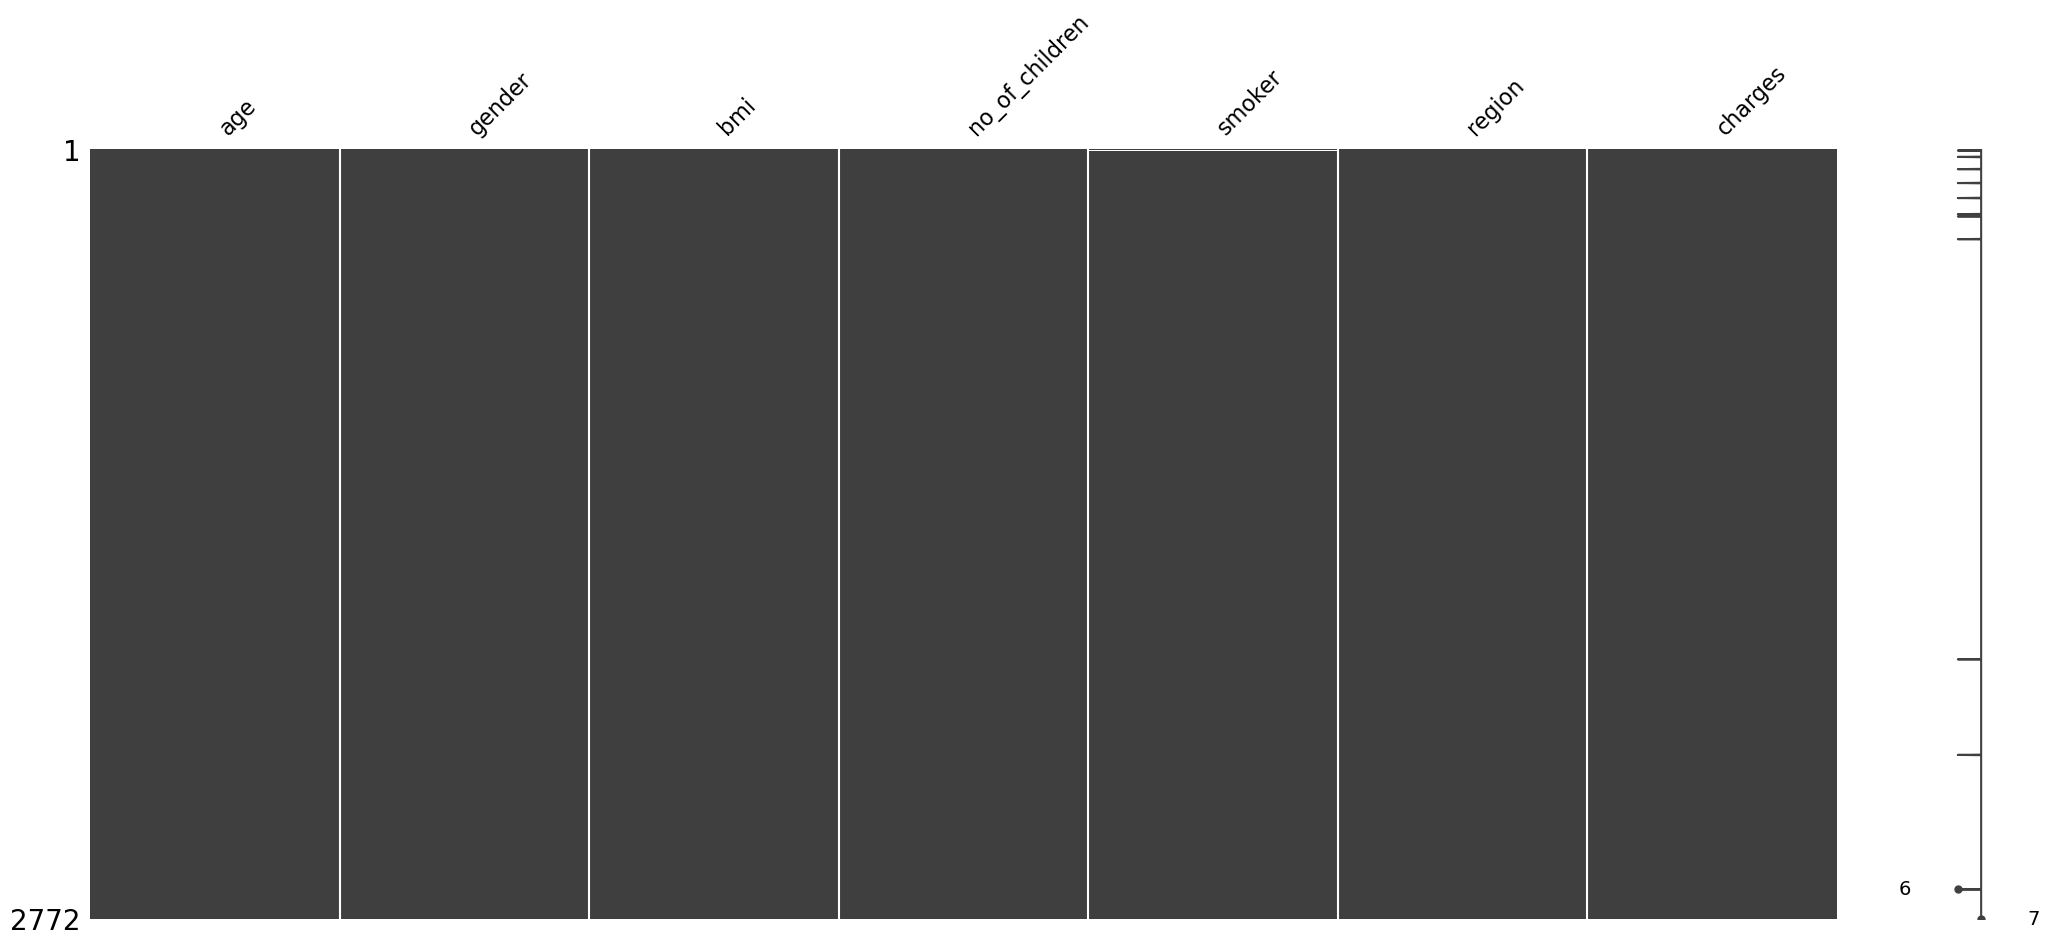

In [11]:
print(df.isna().sum())
msno.matrix(df)

In [12]:
#age imputing
df['age'] = df['age'].astype('float')
df['age'] = df['age'].fillna(df['age'].mean())

#smoker imputing
mostfreq = df['smoker'].value_counts().index[0]
df['smoker'] = df['smoker'].fillna(mostfreq)

df[["age","smoker"]] = df[["age","smoker"]].astype("int")

df.isna().sum()

age               0
gender            0
bmi               0
no_of_children    0
smoker            0
region            0
charges           0
dtype: int64

In [13]:
df['charges'] = np.round(df['charges'],2)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


In [14]:
#Removing the outliers
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

# 4. Exploratory Data Analysis (EDA)

<Axes: >

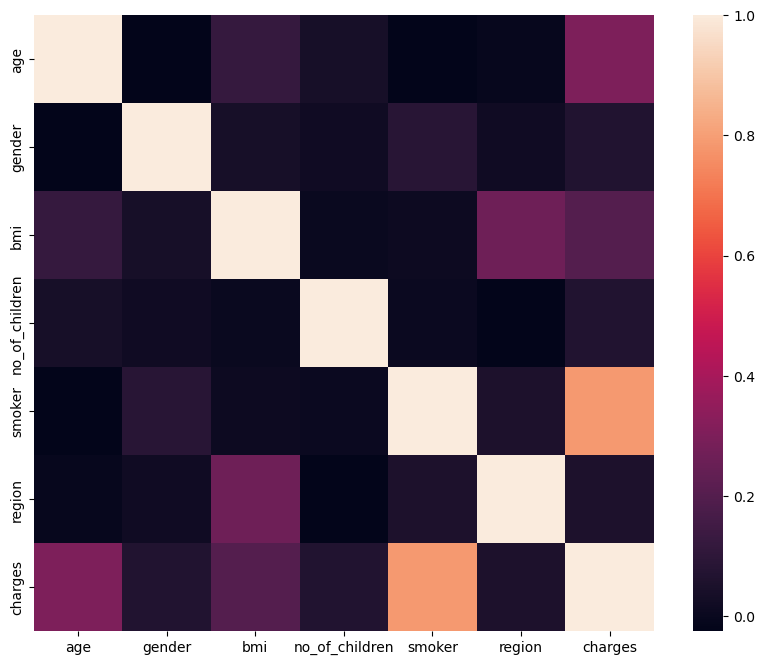

In [16]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(numeric_only = True))

In [17]:
#PLOT Function
def myplot(xx):
    fig = plt.figure(figsize = (8,6))
    sns.regplot(x=xx, y="charges", data=df, line_kws={"color": "red"})
    plt.title(f'charges vs {xx}')
    plt.ylim(0,)

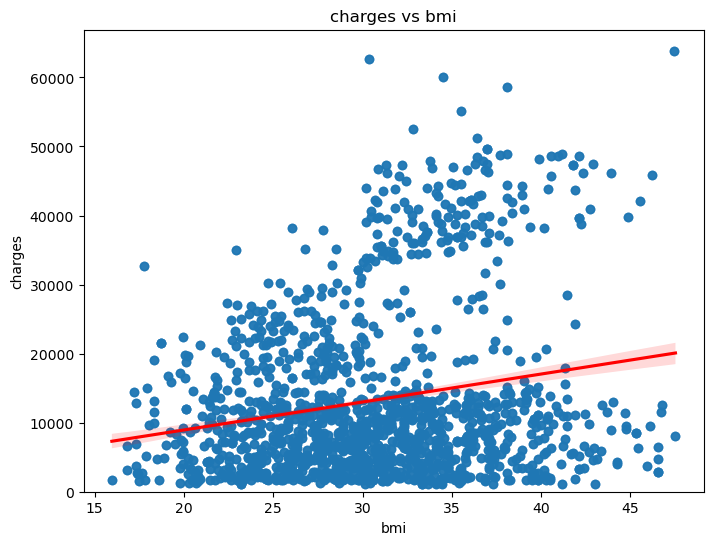

In [18]:
myplot('bmi')

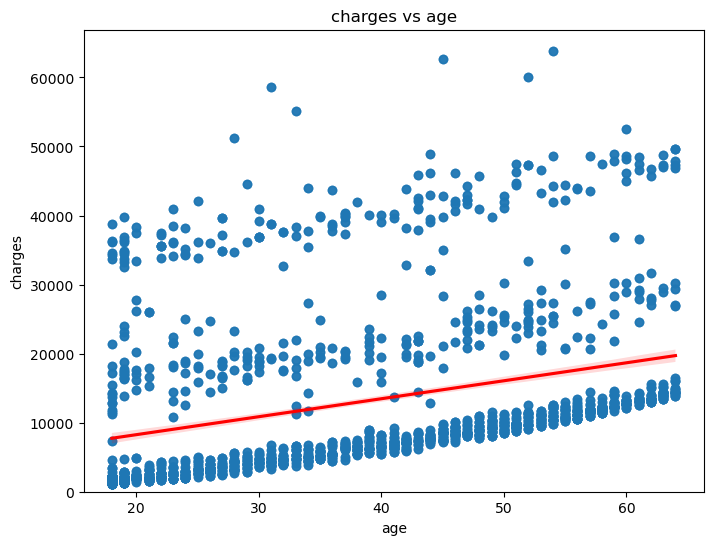

In [19]:
myplot('age')

[Text(0, 0, 'Non-smoker'), Text(1, 0, 'Smoker')]

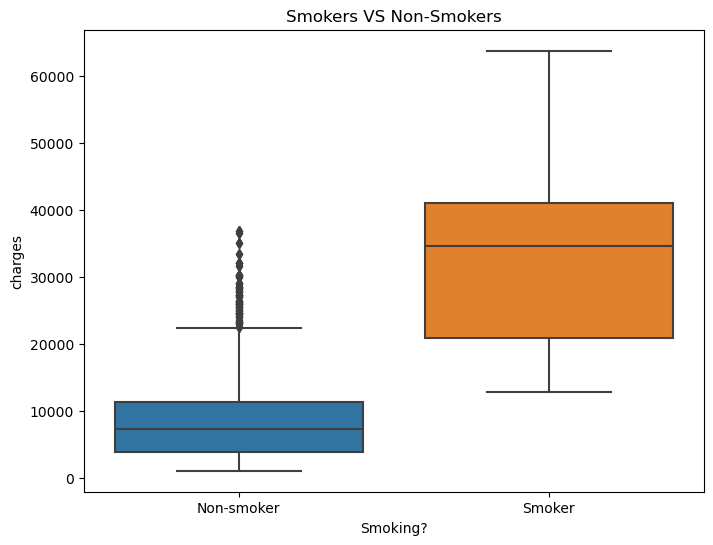

In [20]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x = 'smoker', y = 'charges', data = df)
plt.xlabel('Smoking?')
plt.title('Smokers VS Non-Smokers')
ax.set_xticklabels(['Non-smoker', 'Smoker'])

# 5. Preparing Data

In [22]:
#Train Test Split
x_data = df.drop(['charges'], axis = 1)
y_data = df['charges']
x_train, x_test, y_train,y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 14)
print(f'number of training samples: {x_train.shape[0]}')
print(f'number of test samples: {x_test.shape[0]}')

number of training samples: 2206
number of test samples: 552


# 6. Model Development

In [24]:
#Plotting distribution function of Predictd and Actual Values
def mydisplot(hhhh, modelname):
    plt.figure(figsize=(8, 6))
        
    ax1 = sns.kdeplot(y_test, color="r", label='Actual Values')
    ax2 = sns.kdeplot(hhhh, color="b", label='Predicted Values', ax=ax1)
    
    plt.title(f'Actual Charges Vs Predicted Charges {modelname}')
    plt.xlabel('Medical Insurance Charges')
    
    plt.ylim(0,)
    plt.legend()

In [25]:
#Multiple Linear Regression
mlr = LinearRegression()
mlr.fit(x_train,y_train)
Yhat_mlr = mlr.predict(x_test)

print('model score on training data:', mlr.score(x_train, y_train))
print('mlr model score:', r2_score(y_test, Yhat_mlr))


model score on training data: 0.7469839825749321
mlr model score: 0.7575147740572175


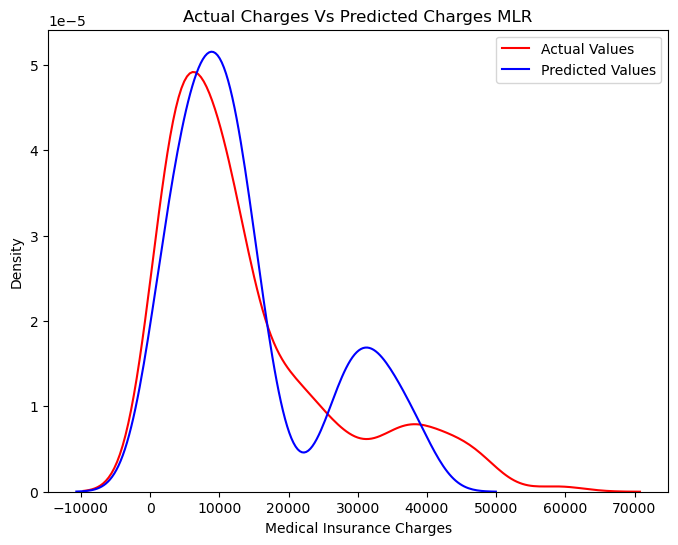

In [26]:
mydisplot(Yhat_mlr, 'MLR')

In [27]:
#Pipeline for Multiple Linear Regression with Standardization and PolyFeatures
Input_mlr = [('scaler',StandardScaler()), ('poly',PolynomialFeatures(include_bias = False)), ('LR_mod',LinearRegression())]
pipe_mlr = Pipeline(Input_mlr)
pipe_mlr.fit(x_train, y_train)
Yhat_pipe_mlr = pipe_mlr.predict(x_test)

print('Pipeline score:', r2_score(y_test, Yhat_pipe_mlr))

Pipeline score: 0.8429694954137918


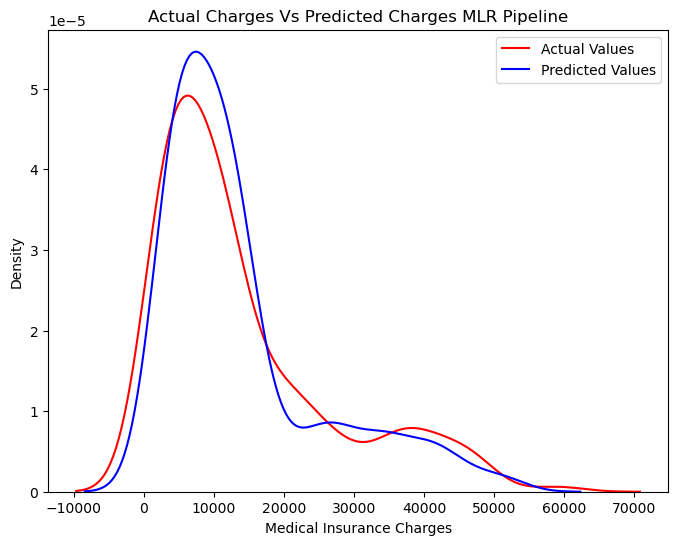

In [28]:
mydisplot(Yhat_pipe_mlr, 'MLR Pipeline')

# 7. Model Refinement

In [30]:
#Ridge with GridSearchCV
rlr = Ridge()
parameters = [{'alpha':np.linspace(0, 1, 100)}]
Grid = GridSearchCV(rlr, parameters, cv = 5)
Grid.fit(x_train, y_train)

RLR = Grid.best_estimator_
Yhat_RLR = RLR.predict(x_test)
print('Ridge model score:',r2_score(y_test, Yhat_RLR))

Ridge model score: 0.7574697316792366


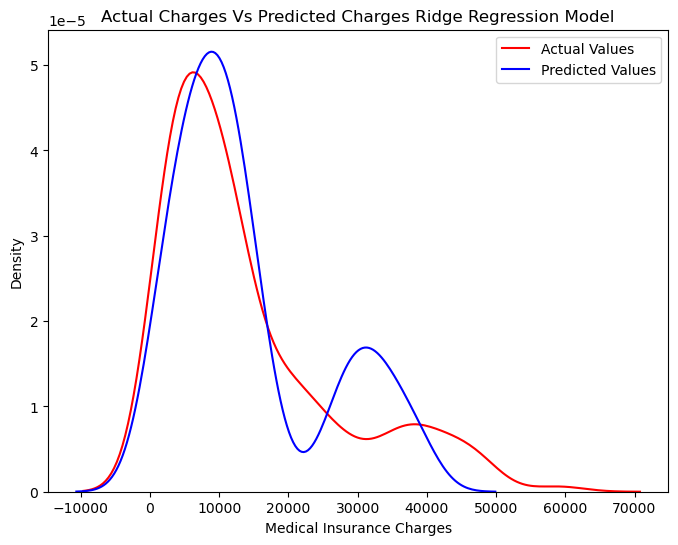

In [31]:
mydisplot(Yhat_RLR, 'Ridge Regression Model')

In [32]:
#Pipeline for Ridge with Standardization and PolyFeatures
Input_rlr = [('scaler',StandardScaler()), ('poly',PolynomialFeatures(include_bias = False)), ('RD_mod',Ridge(alpha = 0.2525252525))]
pipe_rlr = Pipeline(Input_rlr)
pipe_rlr.fit(x_train, y_train)
Yhat_pipe_rlr = pipe_rlr.predict(x_test)

print('Pipeline score:', r2_score(y_test, Yhat_pipe_rlr))

Pipeline score: 0.8429880263605922


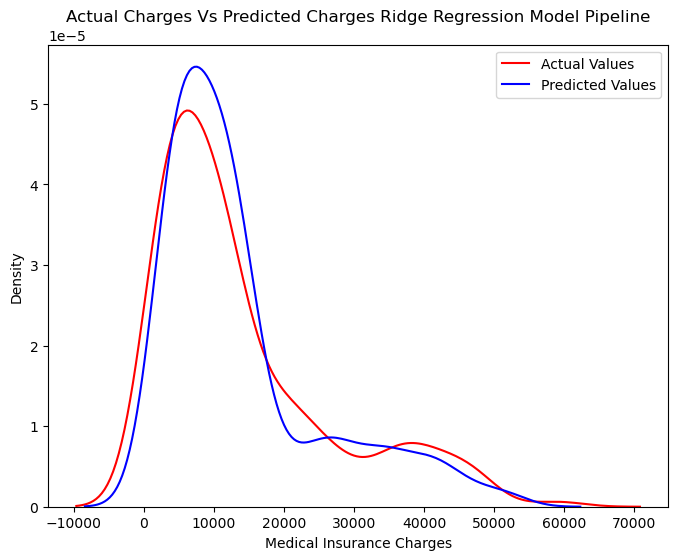

In [33]:
mydisplot(Yhat_pipe_rlr, 'Ridge Regression Model Pipeline')

In [34]:
#Cross Validation Scores for MLR and Ridge
scores_mlr = cross_val_score(LinearRegression(), x_data, y_data, cv = 5)
print('Multiple Linear Regression Cross Validation:',scores_mlr)
scores_mlr = cross_val_score(Ridge(alpha = 0.25252525), x_data, y_data, cv = 5)
print('Ridge Regression Cross Validation:',scores_mlr)

Multiple Linear Regression Cross Validation: [0.74097142 0.75213673 0.76415527 0.74563925 0.7402902 ]
Ridge Regression Cross Validation: [0.7409954  0.75213706 0.76413863 0.74561581 0.7403037 ]
